# Homework 3 -- Bears and trout

In [37]:
# imports
import numpy as np

from scipy.integrate import solve_ivp

from matplotlib import pyplot as plt
import seaborn as sns

import pandas

In [38]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Our equations

## $\dot X_1 = w_1 (X_1 - X_{10}) + A X_1 X_2$

## $\dot X_2 = w_2 (X_2 - X_{20}) + B X_1^2$

# Init

In [8]:
w1 = -1. # bears

In [4]:
A = 0.0005
B = 10

In [18]:
X10 = 10.
X20 = 1500.

## Solve

In [41]:
def equations(t, X1X2, X10X20, w1w2AB):
    dX1dt = w1w2AB[0]*(X1X2[0] - X10X20[0]) + w1w2AB[2] * X1X2[0] * X1X2[1]
    dX2dt = w1w2AB[1]*(X1X2[1] - X10X20[1]) - w1w2AB[-1] * X1X2[0]**2
    # 
    return dX1dt, dX2dt

In [42]:
nstep = 100
tspan = np.linspace(0, 10, nstep)

In [72]:
def doit(w2, w1=-1.):
    # %% Solve differential equation
    X1X2 = (X10, X20)
    X10X20 = (X10, X20)
    w1w2AB = (w1, w2, A, B)
    sol = solve_ivp(lambda t, x1x2: equations(t, x1x2, X10X20, w1w2AB), 
                [tspan[0], tspan[-1]], X1X2, t_eval=tspan)
    return sol

## Plot

In [54]:
def plot(sol, w2):
    # Plot me
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    _ = sns.scatterplot(x=sol.t, y=sol.y[0,:], ax=ax1)
    ax1.set_xlabel('t')
    ax1.set_ylabel('N bears')
    ax1.set_title('Bears: w2 = {}'.format(w2))
    # Trout
    _ = sns.scatterplot(x=sol.t, y=sol.y[1,:], ax=ax2)
    ax2.set_xlabel('t')
    ax2.set_ylabel('N trout')
    ax2.set_title('Trout: w2 = {}'.format(w2))
    #
    plt.show()

## $w_2 = -10$

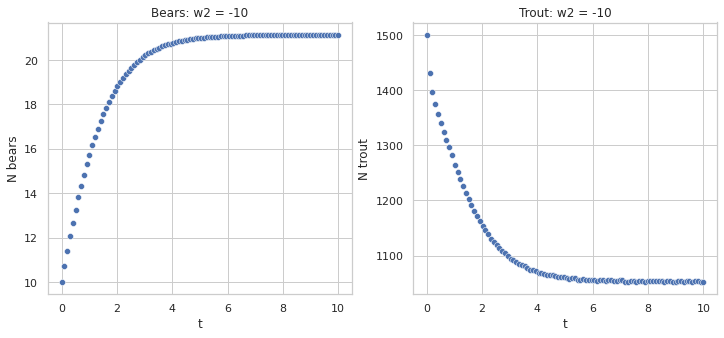

In [62]:
sol_10 = doit(-10)
plot(sol_10, -10)

## $w_2 = -5$

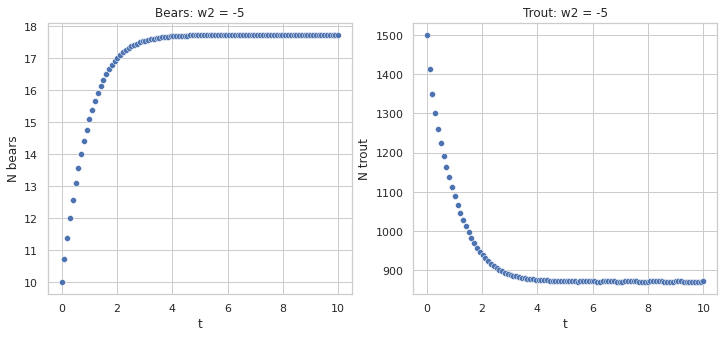

In [61]:
#w2 = -5. # trout
sol_5 = doit(-5)
plot(sol_5, -5)

## $w_2 = -2, -1$

In [64]:
sol_2 = doit(-2)
sol_1 = doit(-1.)

## Plot em all

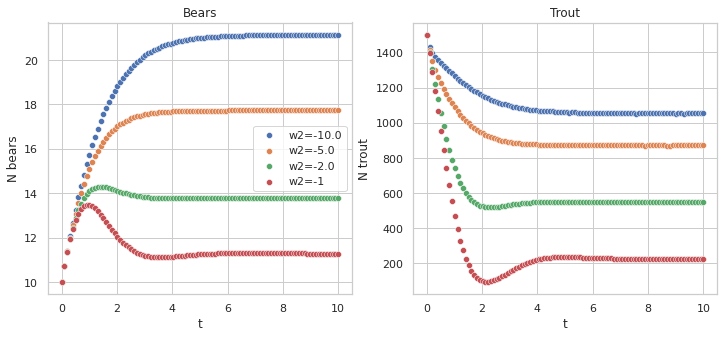

In [66]:
# Plot me
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for sol, w2 in zip([sol_10, sol_5, sol_2, sol_1], (-10., -5., -2., -1)):
    _ = sns.scatterplot(x=sol.t, y=sol.y[0,:], ax=ax1, label='w2={}'.format(w2))
    ax1.set_xlabel('t')
    ax1.set_ylabel('N bears')
    ax1.set_title('Bears')
# Trout
    _ = sns.scatterplot(x=sol.t, y=sol.y[1,:], ax=ax2)
    ax2.set_xlabel('t')
    ax2.set_ylabel('N trout')
    ax2.set_title('Trout')
#
plt.show()

----

# (b) Now let $w_1 > 0$ but near 0 and explore.

In [68]:
w1 = 0.05

In [74]:
sol_b_10 = doit(-10., w1=w1)
sol_b_5 = doit(-5., w1=w1)
sol_b_2 = doit(-2., w1=w1)
sol_b_1 = doit(-1., w1=w1)

## Plot

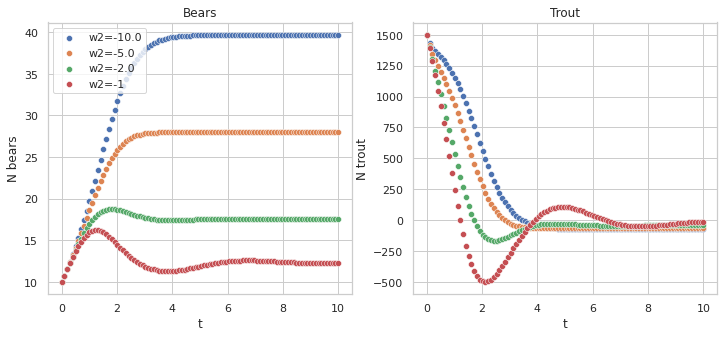

In [75]:
# Plot me
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for sol, w2 in zip([sol_b_10, sol_b_5, sol_b_2, sol_b_1], (-10., -5., -2., -1)):
    _ = sns.scatterplot(x=sol.t, y=sol.y[0,:], ax=ax1, label='w2={}'.format(w2))
    ax1.set_xlabel('t')
    ax1.set_ylabel('N bears')
    ax1.set_title('Bears')
# Trout
    _ = sns.scatterplot(x=sol.t, y=sol.y[1,:], ax=ax2)
    ax2.set_xlabel('t')
    ax2.set_ylabel('N trout')
    ax2.set_title('Trout')
#
plt.show()

In [ ]:
### Indeed, the trout are now 